# Imports & Setups

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

RAW_PATH = 'D:/Master_Folder/Data Science Course/Projects/churn_prediction_project/data/raw/telco_customer_churn_dataset.csv'
FIG_DIR = 'D:/Master_Folder/Data Science Course/Projects/churn_prediction_project/reports/figures'

os.makedirs(FIG_DIR, exist_ok=True)

In [2]:
df = pd.read_csv(RAW_PATH)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [3]:
# Rows & columns
df.shape

(7043, 21)

In [4]:
# Column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
(df == " ").sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges seems to have null values.

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [9]:
print(df['TotalCharges'].dtype)
print(df['TotalCharges'].isna().sum())

float64
0


In [10]:
# Convert Churn → binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [11]:
# Clean categorical columns (trim + unify)
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()

In [12]:
# Replace misleading categories:
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No'})

In [13]:
# Validate cleaned categories
for col in df.select_dtypes(include='object'):
    print(col, df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(7043, 21)

# Exploratory Data Analysis

### Churn rate

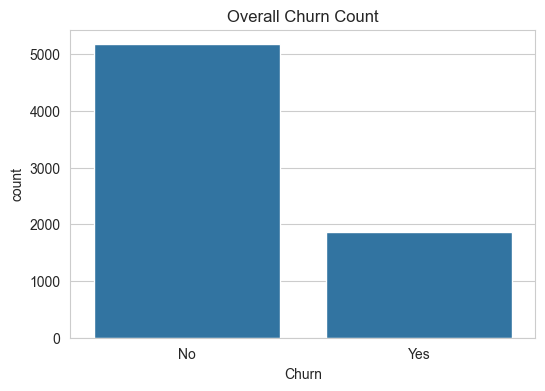

In [16]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='Churn', data=df)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

plt.title('Overall Churn Count')
plt.savefig(f'{FIG_DIR}/01_churn_count.png', bbox_inches='tight')
plt.show()

### Churn % by Contract Type

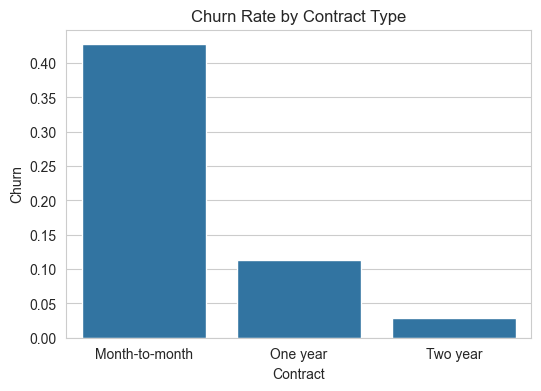

In [17]:
plt.figure(figsize=(6,4))

contract_rate = df.groupby('Contract')['Churn'].mean().reset_index()
sns.barplot(x='Contract', y='Churn', data=contract_rate)

plt.title('Churn Rate by Contract Type')
plt.savefig(f'{FIG_DIR}/02_churn_by_contract.png', bbox_inches='tight')
plt.show()

### Tenure distribution by churn

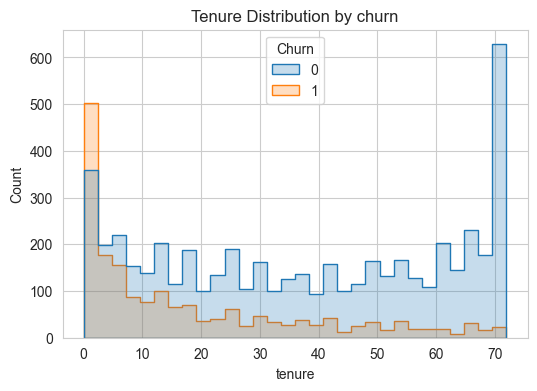

In [18]:
plt.figure(figsize=(6,4))

sns.histplot(df, x='tenure', hue='Churn', bins=30, element='step')

plt.title('Tenure Distribution by churn')
plt.savefig(f'{FIG_DIR}/03_tenure_by_churn.png', bbox_inches='tight')
plt.show()

### Monthly charges vs churn

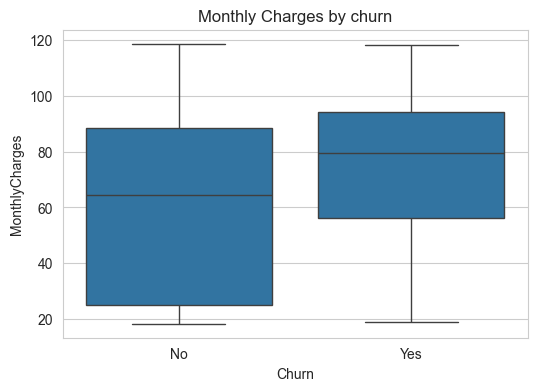

In [19]:
plt.figure(figsize=(6,4))

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

plt.xticks([0,1], ['No', 'Yes'])
plt.title('Monthly Charges by churn')
plt.savefig(f'{FIG_DIR}/04_MonthlyCharges_by_churn.png', bbox_inches='tight')
plt.show()

### PaymentMethod vs churn

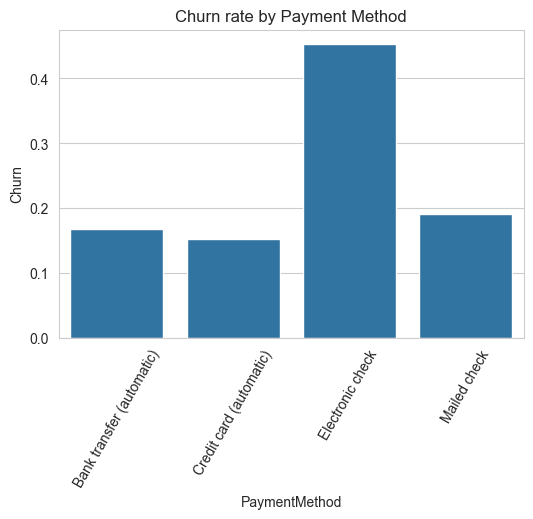

In [20]:
plt.figure(figsize=(6,4))

pvt = df.groupby('PaymentMethod')['Churn'].mean().reset_index()
sns.barplot(x='PaymentMethod', y='Churn', data=pvt)

plt.xticks(rotation=60)
plt.title("Churn rate by Payment Method")
plt.savefig(f'{FIG_DIR}/05_churn_by_paymentmethod.png', bbox_inches='tight')
plt.show()

In [21]:
service_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies']

df['services_count'] = (df[service_cols] == 'Yes').sum(axis=1)

### Service Count vs Churn

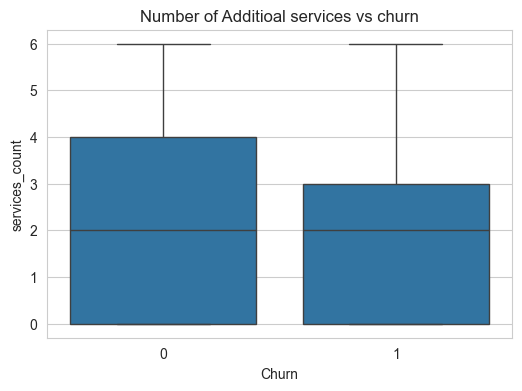

In [22]:
plt.figure(figsize=(6,4))

sns.boxplot(x='Churn', y='services_count', data=df)

plt.title('Number of Additioal services vs churn')
plt.savefig(f'{FIG_DIR}/06_services_count_by_churn.png', bbox_inches='tight')
plt.show()

### InternetServices vs OnlineSecurity

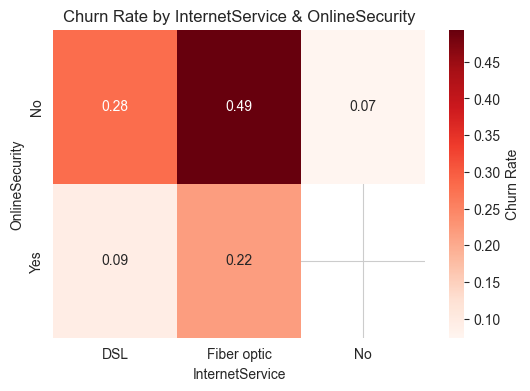

In [23]:
plt.figure(figsize=(6,4))

heat = df.groupby(['OnlineSecurity', 'InternetService'])['Churn'].mean().unstack()

sns.heatmap(heat, annot=True, cmap='Reds', fmt='.2f', cbar_kws={'label': 'Churn Rate'})

plt.title('Churn Rate by InternetService & OnlineSecurity')
plt.savefig(f'{FIG_DIR}/07_heatmap_internet_onlinesecurity.png', bbox_inches='tight')
plt.show()

### Total Charges VS Churn

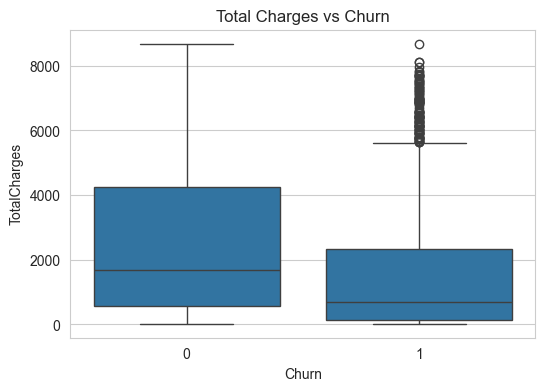

In [24]:
plt.figure(figsize=(6,4))

sns.boxplot(x='Churn', y='TotalCharges', data=df)

plt.title('Total Charges vs Churn')
plt.savefig(f'{FIG_DIR}/08_totalcharges_by_churn.png', bbox_inches='tight')
plt.show()

### Numeric correlation heatmap

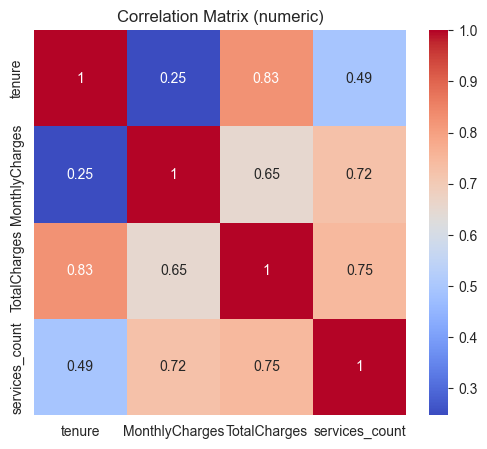

In [25]:
num_cols = ['tenure','MonthlyCharges','TotalCharges','services_count']

plt.figure(figsize=(6,5))

sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Matrix (numeric)")
plt.savefig(f"{FIG_DIR}/09_numeric_corr.png", bbox_inches='tight')
plt.show()

# findings

- Month-to-month contracts have the highest churn.
- Tenure is strongly inverted with churn — early churn is a major issue.
- Customers lacking OnlineSecurity and TechSupport churn more.
- High MonthlyCharges associates with higher churn in many segments.
- Customers with more services (add-ons) churn less i.e cross-sell opportunity.
- PaymentMethod patterns highlight friction-prone billing methods.

